In [21]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.linear_model

In [22]:
#Loading the data
happiness_factor = pd.read_csv("Dataset/happiness.csv", thousands = ',')
gdp_per_capita = pd.read_csv("Dataset/capita.txt", thousands = ',', delimiter='\t', encoding='latin1', na_values="n/a")

In [23]:
#Mergig the two datas
def prepare_stats(oecd_bli, gdp_per_capita):
    oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]
    oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")
    gdp_per_capita.rename(columns={"2015": "GDP per capita"}, inplace=True)
    gdp_per_capita.set_index("Country", inplace=True)
    full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita,
                                  left_index=True, right_index=True)
    full_country_stats.sort_values(by="GDP per capita", inplace=True)
    remove_indices = [0, 1, 6, 8, 33, 34, 35]
    keep_indices = list(set(range(36)) - set(remove_indices))
    return full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[keep_indices]

In [24]:
#data preparation
country_stats = prepare_stats(happiness_factor, gdp_per_capita)
x = np.c_[country_stats["GDP per capita"]]
y = np.c_[country_stats["Life satisfaction"]]

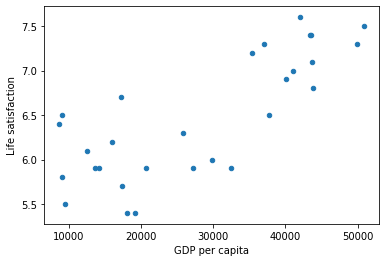

In [25]:
#Visualize the data
country_stats.plot(kind='scatter', x="GDP per capita", y='Life satisfaction')
plt.show()

In [26]:
# Select a linear model
model = sklearn.linear_model.LinearRegression()

In [27]:
model.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [28]:
X_new = [[22587]]  # Cyprus' GDP per capita
print(model.predict(X_new))

[[6.25984414]]
